In [238]:
from cobra import Reaction, Metabolite
from cobra.io import read_sbml_model
model_LB_vio_fad=read_sbml_model('Models/model_VN_LB_vio-fad.xml')
import matplotlib.pyplot as plt

In [239]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [240]:
from cobra.util.solver import linear_reaction_coefficients
linear_reaction_coefficients(model_LB_vio_fad)

{<Reaction Growth at 0x20df9470820>: 1.0}

# LB media

Setting the ratios of the Violacein and Deoxyviolacein production based on the literature [Long et.el, 2017]

In [241]:
ratio = model_LB_vio_fad.problem.Constraint(
    1.9*model_LB_vio_fad.reactions.Violacein.flux_expression - model_LB_vio_fad.reactions.Deoxyviolacein.flux_expression,
    lb=0, ub=0)
model_LB_vio_fad.add_cons_vars(ratio)

## Analysis of glucose uptake in LB media

### Glucose uptake and growth with only glucose bounds set

On the following graph, the x axis is the glucose uptake rate, and the y is the growth rate. We set the boundaries to -1000, 1000 so that we could see the characteristics of the growth if there were almost infinite glucose uptake. The oxygen uptake rate is set to default. We can see, that after about 480 mmol/gDW/h the growth rate deteriorates, but it won't be a problem as due to literature, *Vibrio N.* can only take up less glucose (it is shown in a later paragraph, where we set the glucose boundaries to the found value).

Optimal glucose uptake rate for growth: -473.68421052631584 mmol/gDW/h
Maximum Growth rate: 16.811952132337396 1/h


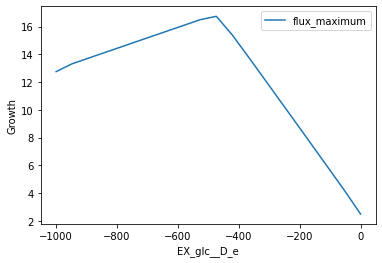

In [242]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_glc__D_e.bounds = -1000, 0
    ppp_glc_LB_1 = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.EX_glc__D_e],
                    objective=model_LB_vio_fad.reactions.Growth)
    
    maxvio = round(ppp_glc_LB_1.flux_maximum[ppp_glc_LB_1.flux_maximum.idxmax()], 4)
    v = ppp_glc_LB_1.EX_glc__D_e[round(ppp_glc_LB_1.flux_maximum,4) == maxvio]
    
    print('Optimal glucose uptake rate for growth:', max(v), 'mmol/gDW/h')
    print('Maximum Growth rate:', model_LB_vio_fad.optimize().objective_value, '1/h')
    ppp_glc_LB_1.plot(x='EX_glc__D_e', y='flux_maximum')
    plt.ylabel('Growth')

### Glucose and growth with glucose and oxygen bounds set to -1000 , 0

Here we also set the oxygen uptake rate to -1000, 1000 to see if it does anything to the graph, and it did, because in the first one the oxygen uptake rate was the limiting, because of the default values. Here we can see a steady state after about the same glucose uptake as in the previous graph, but the growth rate is also higher if we don't limit the oxygen uptake. This also is an ideal case, as it predicts the maximum of glucose uptake rate.

Optimal glucose uptake rate for growth: -526.3157894736842 mmol/gDW/h
Maximum Growth rate: 38.69149512993232 1/h


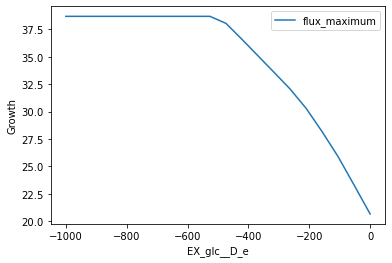

In [243]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_glc__D_e.bounds = -1000, 0
    model_LB_vio_fad.reactions.EX_o2_e.bounds = -1000, 0
    ppp_glc_LB_2 = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.EX_glc__D_e],
                    objective=model_LB_vio_fad.reactions.Growth)
    
    maxvio = round(ppp_glc_LB_2.flux_maximum[ppp_glc_LB_2.flux_maximum.idxmax()], 4)
    v = ppp_glc_LB_2.EX_glc__D_e[round(ppp_glc_LB_2.flux_maximum,4) == maxvio]
    
    print('Optimal glucose uptake rate for growth:', max(v), 'mmol/gDW/h')
    print('Maximum Growth rate:', model_LB_vio_fad.optimize().objective_value, '1/h')
    ppp_glc_LB_2.plot(x='EX_glc__D_e', y='flux_maximum')
    plt.ylabel('Growth')

### Glucose uptake rate and growth with rational glucose and oxygen bounds

Due to the literature, *Vibrio N.* has a glucose uptake rate of 3.90 gglc/gDW/h. We converted this into the units that cobrapy is using, which is mmol glc/gDW/h. Glucose has a molar weight of 180.156 g/mol, so the value can be calculated as: **(3.90 [gglc/gDW/h]/180.156 [g/mol]) * 1000 = 21.4679 mmol glc/gDW/h** [Long et.al, 2017]

We chose the boundary value to be **21.5 mmol/gDW/h**

The boundary of oxygen is set to the value that *E. coli* is taking up based on the table 7.3 from the textbook Bioreaction Engineering Principles, 2011. *E. coli* has a Yxo value of 70 mmol oxygen/gDW, so to obtain the value in mmol/gDW/h which is the unit of flux in cobrapy, we have to multiply by the growth rate of *E. coli*, which is 0.87 1/h based on the model we used in the class. The maximum oxygen uptake is 70 mmol/gDW * 0.87 1/h = 60.9 mmol/gDW/h

We choose the lower bound to be **61 mmol/gDW/h** based on our calculations.

Optimal glucose uptake rate for growth: -21.5 mmol/gDW/h
Maximum Growth rate: 6.161849702549274 1/h


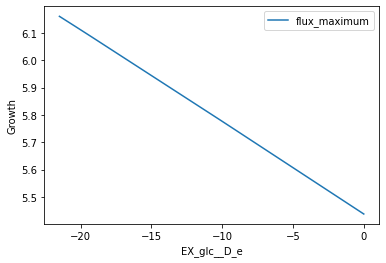

In [244]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_glc__D_e.bounds = -21.5, 0
    model_LB_vio_fad.reactions.EX_o2_e.bounds = -61, 0
    ppp_glc_LB_3 = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.EX_glc__D_e],
                    objective=model_LB_vio_fad.reactions.Growth)
    
    maxvio = round(ppp_glc_LB_3.flux_maximum[ppp_glc_LB_3.flux_maximum.idxmax()], 4)
    v = ppp_glc_LB_3.EX_glc__D_e[round(ppp_glc_LB_3.flux_maximum,4) == maxvio]
    
    print('Optimal glucose uptake rate for growth:', max(v), 'mmol/gDW/h')
    print('Maximum Growth rate:', model_LB_vio_fad.optimize().objective_value, '1/h')
    ppp_glc_LB_3.plot(x='EX_glc__D_e', y='flux_maximum')
    plt.ylabel('Growth')

Due to the optimization, the optimal glucose uptake rate would be the maximum allowed value, which is **21.5 mmol/gDW/h**, the growth rate is **6.14 1/h**

## Optimal O2 uptake rate in LB media

### Oxygen uptake for growth

In the following we wanted to see what the ideal optimal oxygen uptake rate would be with the default set glucose uptake rate. We got an unrealisticly high value.

Optimal oxygen uptake rate for growth: -578.9473684210527 mmol/gDW/h
Maximum Growth rate: 21.163566928733708 1/h


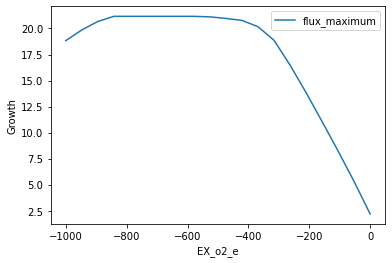

In [245]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_o2_e.bounds = -1000, 0
    ppp_o2_LB_growth = production_envelope(model_LB_vio_fad,
                    reactions = [model_LB_vio_fad.reactions.EX_o2_e],
                    objective = model_LB_vio_fad.reactions.Growth)
    
    maxvio = round(ppp_o2_LB_growth.flux_maximum[ppp_o2_LB_growth.flux_maximum.idxmax()], 4)
    v = ppp_o2_LB_growth.EX_o2_e[round(ppp_o2_LB_growth.flux_maximum,4) == maxvio]
    
    print('Optimal oxygen uptake rate for growth:', max(v), 'mmol/gDW/h')
    print('Maximum Growth rate:', model_LB_vio_fad.optimize().objective_value, '1/h')
    ppp_o2_LB_growth.plot(x='EX_o2_e', y='flux_maximum')
    plt.ylabel('Growth')

### Oxygen uptake for growth with realistic glucose uptake rate

Here we wanted to see if we set the glucose uptake rate to the literature one, but we gave it unrealisticly high maximum value in oxygen uptake rate.

Optimal oxygen uptake rate for growth: -578.9473684210527 mmol/gDW/h
Maximum Growth rate: 21.740755117699166 1/h


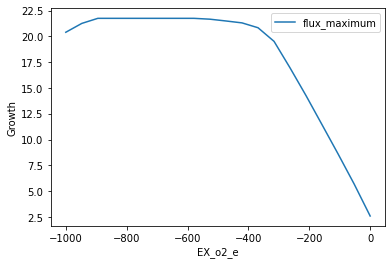

In [246]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_o2_e.bounds = -1000, 0
    model_LB_vio_fad.reactions.EX_glc__D_e.bounds = -21.5, 0
    ppp_o2_LB_growth_2 = production_envelope(model_LB_vio_fad,
                    reactions = [model_LB_vio_fad.reactions.EX_o2_e],
                    objective = model_LB_vio_fad.reactions.Growth)
    
    maxvio = round(ppp_o2_LB_growth_2.flux_maximum[ppp_o2_LB_growth_2.flux_maximum.idxmax()], 4)
    v = ppp_o2_LB_growth_2.EX_o2_e[round(ppp_o2_LB_growth_2.flux_maximum,4) == maxvio]
    
    print('Optimal oxygen uptake rate for growth:', max(v), 'mmol/gDW/h')
    print('Maximum Growth rate:', model_LB_vio_fad.optimize().objective_value, '1/h')
    ppp_o2_LB_growth_2.plot(x='EX_o2_e', y='flux_maximum')
    plt.ylabel('Growth')

Based on the diagram we can see, that non only the carbon source present, but the oxygen uptake rate is limiting. If we set it to a realistic value, the growth rate will also be lower.

### Oxygen uptake for growth with realistic oxygen and glucose uptakes

Optimal oxygen uptake rate for growth: -61.0 mmol/gDW/h
Maximum Growth rate: 6.1618497025492625 1/h


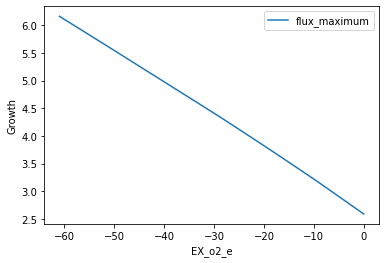

In [247]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_o2_e.bounds = -61, 0
    model_LB_vio_fad.reactions.EX_glc__D_e.bounds = -21.5, 0
    ppp_o2_LB_growth_3 = production_envelope(model_LB_vio_fad,
                    reactions = [model_LB_vio_fad.reactions.EX_o2_e],
                    objective = model_LB_vio_fad.reactions.Growth)
    
    maxvio = round(ppp_o2_LB_growth_3.flux_maximum[ppp_o2_LB_growth_3.flux_maximum.idxmax()], 4)
    v = ppp_o2_LB_growth_3.EX_o2_e[round(ppp_o2_LB_growth_3.flux_maximum,4) == maxvio]
    
    print('Optimal oxygen uptake rate for growth:', max(v), 'mmol/gDW/h')
    print('Maximum Growth rate:', model_LB_vio_fad.optimize().objective_value, '1/h')
    ppp_o2_LB_growth_3.plot(x='EX_o2_e', y='flux_maximum')
    plt.ylabel('Growth')

When we set the value to realistic ones obtained from literature, it can be seen that it takes up all the oxygen it is allowed to, and we get a growth rate of **6.16 1/h**

### Oxygen uptake for production

We also wanted to see if the oxygen uptake rate changes if we set the objective to production instead of growth, as we have many oxygen consuming reactions in the production phase. The optimal uptake rate is the same.

Optimal oxygen uptake for Violacein production: -578.9473684210527 mmol/gDW/h
Maximum production rate: 18.682778780122796 mmol/gDW/h


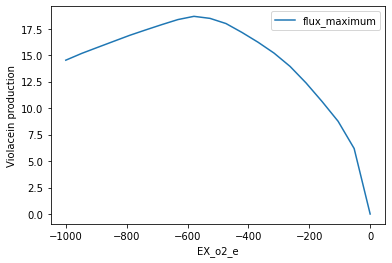

In [248]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_o2_e.bounds = -1000, 1000
    
    model_LB_vio_fad.objective = model_LB_vio_fad.reactions.Violacein
    violacein_production = model_LB_vio_fad.optimize().objective_value
    
    ppp_o2_LB_vio = production_envelope(model_LB_vio_fad,
                    reactions = [model_LB_vio_fad.reactions.EX_o2_e],
                    objective = model_LB_vio_fad.reactions.Violacein)
    
    maxvio = round(ppp_o2_LB_vio.flux_maximum[ppp_o2_LB_vio.flux_maximum.idxmax()], 4)
    v = ppp_o2_LB_vio.EX_o2_e[round(ppp_o2_LB_vio.flux_maximum,4) == maxvio]
    
    print('Optimal oxygen uptake for Violacein production:', max(v), 'mmol/gDW/h')
    print('Maximum production rate:', model_LB_vio_fad.optimize().objective_value, 'mmol/gDW/h')
    ppp_o2_LB_vio.plot(x='EX_o2_e', y='flux_maximum')
    plt.ylabel('Violacein production')

### Oxygen uptake for production with realistic glucose bounds

Optimal oxygen uptake for Violacein production: -578.9473684210527 mmol/gDW/h
Maximum production rate: 19.705730150072032 mmol/gDW/h


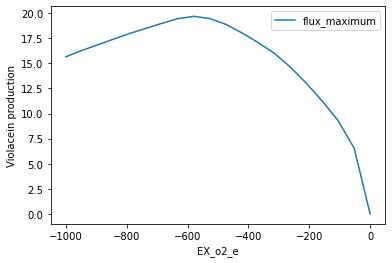

In [249]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_glc__D_e.bounds = -21.5, 21.5
    model_LB_vio_fad.reactions.EX_o2_e.bounds = -1000, 0
    
    model_LB_vio_fad.objective = model_LB_vio_fad.reactions.Violacein
    violacein_production = model_LB_vio_fad.optimize().objective_value
    
    ppp_o2_LB_vio_2 = production_envelope(model_LB_vio_fad,
                    reactions = [model_LB_vio_fad.reactions.EX_o2_e],
                    objective = model_LB_vio_fad.reactions.Violacein)
    
    maxvio = round(ppp_o2_LB_vio_2.flux_maximum[ppp_o2_LB_vio_2.flux_maximum.idxmax()], 4)
    v = ppp_o2_LB_vio_2.EX_o2_e[round(ppp_o2_LB_vio_2.flux_maximum,4) == maxvio]
    
    print('Optimal oxygen uptake for Violacein production:', max(v), 'mmol/gDW/h')
    print('Maximum production rate:', model_LB_vio_fad.optimize().objective_value, 'mmol/gDW/h')
    ppp_o2_LB_vio_2.plot(x='EX_o2_e', y='flux_maximum')
    plt.ylabel('Violacein production')

Here we wanted to see what the oxygen uptake rate and the production would look like if we set the glucose uptake rate to the value from literature. The oxygen uptake is the same, the production is a little higher, but that makes sense, as the default value is -10, and we set that to -21.5

## Analysis of the correlation between Growth and Violacein production in LB media

### With oxygen uptake bounds set to default values

Growth rate at the maximum production reached: 2.5436040243071893 1/h
Maximum production rate: 1.4705882352941169 mmol/gDW/h


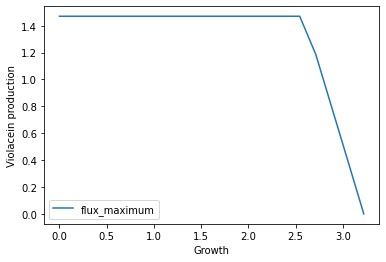

In [250]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_glc__D_e.bounds = -21.5, 0
    
    model_LB_vio_fad.objective = model_LB_vio_fad.reactions.Violacein
    violacein_production = model_LB_vio_fad.optimize().objective_value
    
    ppp_Growth_LB = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.Growth],
                    objective=model_LB_vio_fad.reactions.Violacein)
    
    maxvio = round(ppp_Growth_LB.flux_maximum[ppp_Growth_LB.flux_maximum.idxmax()], 4)
    v = ppp_Growth_LB.Growth[round(ppp_Growth_LB.flux_maximum,4) == maxvio]
    
    print('Growth rate at the maximum production reached:', max(v), '1/h')
    print('Maximum production rate:', model_LB_vio_fad.optimize().objective_value, 'mmol/gDW/h')
    ppp_Growth_LB.plot(x='Growth', y='flux_maximum')
    plt.ylabel('Violacein production')

If the growth rate increases above about 2.54, the violacein production starts to decrease. Therfore the growth and the production are inversly proportional to each other. This can be, due to the fact that after consuming all the glucose, there are still different carbon sources left in the media, so it is enough fo the cell to survive for a while, but not enough to produce.

### With oxygen uptake bounds set to -61, 0

Growth rateat the maximum production reached: 0.0 1/h
Maximum production rate: 7.030243351348035 mmol/gDW/h


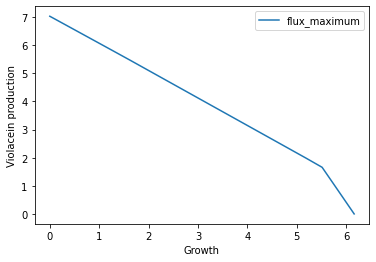

In [260]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_o2_e.bounds = -61, 0
    model_LB_vio_fad.reactions.EX_glc__D_e.bounds = -21.5, 0
    
    model_LB_vio_fad.objective = model_LB_vio_fad.reactions.Violacein
    violacein_production = model_LB_vio_fad.optimize().objective_value
    
    ppp_Growth_LB_2 = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.Growth],
                    objective=model_LB_vio_fad.reactions.Violacein)
    
    maxvio = round(ppp_Growth_LB_2.flux_maximum[ppp_Growth_LB_2.flux_maximum.idxmax()], 4)
    v = ppp_Growth_LB_2.Growth[round(ppp_Growth_LB_2.flux_maximum,4) == maxvio]
    
    print('Growth rateat the maximum production reached:', max(v), '1/h')
    print('Maximum production rate:', model_LB_vio_fad.optimize().objective_value, 'mmol/gDW/h')
    ppp_Growth_LB_2.plot(x='Growth', y='flux_maximum')
    plt.ylabel('Violacein production')

The correlation between growth rate and production is still inversly proportional, the growth rate is 0, as it is taking it when the production is the highest.

We could solve the problem experimentally, in a fed-batch fermentor with a growth phase and a production phase.

### Oxygen and glucose uptake rates set to chosen value with steady state 20% growth

Growth rate at maximum production with minimum 20% growth: 1.2323699405098532 1/h
Maximum production rate: 6.161849702549278 mmol/gDW/h


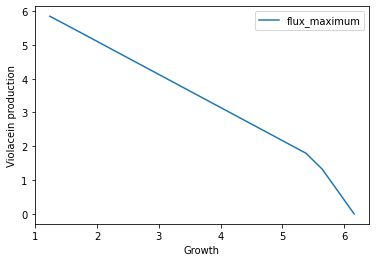

In [252]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_o2_e.bounds = -61, 0
    model_LB_vio_fad.reactions.EX_glc__D_e.bounds = -21.5, 21.5
    
    Growth = model_LB_vio_fad.optimize().fluxes.Growth
    model_LB_vio_fad.reactions.Growth.lower_bound = Growth*0.2
    
    ppp_Growth_LB_2 = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.Growth],
                    objective=model_LB_vio_fad.reactions.Violacein)
    
    maxvio = round(ppp_Growth_LB_2.flux_maximum[ppp_Growth_LB_2.flux_maximum.idxmax()], 4)
    v = ppp_Growth_LB_2.Growth[round(ppp_Growth_LB_2.flux_maximum,4) == maxvio]
    
    print('Growth rate at maximum production with minimum 20% growth:', max(v), '1/h')
    print('Maximum production rate:', model_LB_vio_fad.optimize().objective_value, 'mmol/gDW/h')
    ppp_Growth_LB_2.plot(x='Growth', y='flux_maximum')
    plt.ylabel('Violacein production')

If we set a minimum growth rate, as expected, the production rate also decreases, but the characteristics of the graph are not changing. We still have a break at about 5.2 1/h growth rate, where we probably reach the end of the glucose supply.

# M9 media

In [253]:
model_M9_vio_fad=read_sbml_model('Models/model_VN_M9_vio-fad.xml')

Setting the ratios of the Violacein and Deoxyviolacein production based on the literature [Long et.el, 2017]

In [254]:
ratio = model_M9_vio_fad.problem.Constraint(
    model_M9_vio_fad.reactions.Violacein.flux_expression - 4.2*model_M9_vio_fad.reactions.Deoxyviolacein.flux_expression,
    lb=0, ub=0)
model_M9_vio_fad.add_cons_vars(ratio)

In M9 media we didn't do every plot as in the LB, as LB was our chosen one, and we had many plots from there, some of them not relevant to the project, so we left them out from the M9 part.

## Analysis of glucose uptake in M9 media

We first set the boundaries to -1000, but during the plotting it showed that a lot less is needed, so we set it to -20, so we can see the changes in the graph better. (After -20 the graph shows a steady straight line.)

### Glucose bounds set to -20, 1000

Optimal glucose uptake rate for growth: -16.842105263157894 mmol/gDW/h
Maximum Growth rate: 0.8930785785011137 1/h


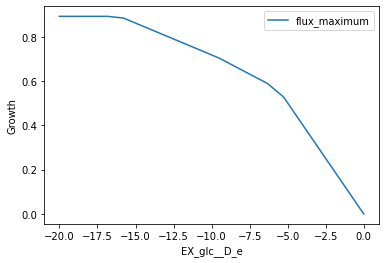

In [255]:
with model_M9_vio_fad:
    model_M9_vio_fad.reactions.EX_glc__D_e.bounds = -20, 1000  
    ppp_glc_M9 = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.EX_glc__D_e],
                    objective=model_M9_vio_fad.reactions.Growth)
    
    maxvio = round(ppp_glc_M9.flux_maximum[ppp_glc_M9.flux_maximum.idxmax()], 4)
    v = ppp_glc_M9.EX_glc__D_e[round(ppp_glc_M9.flux_maximum,4) == maxvio]
    
    print('Optimal glucose uptake rate for growth:', max(v), 'mmol/gDW/h')
    print('Maximum Growth rate:', model_M9_vio_fad.optimize().objective_value, '1/h')
    ppp_glc_M9.plot(x='EX_glc__D_e', y='flux_maximum')
    plt.ylabel('Growth')

### Glucose uptake rate bounds set to -20, 1000 and oxygen uptake rate bounds set to -1000, 1000

Optimal glucose uptake rate for growth: -9.473684210526317 mmol/gDW/h
Maximum Growth rate: 0.893078578501116 1/h


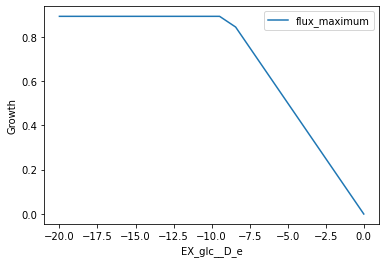

In [256]:
with model_M9_vio_fad:
    model_M9_vio_fad.reactions.EX_glc__D_e.bounds = -20, 1000
    model_M9_vio_fad.reactions.EX_o2_e.bounds = -1000, 1000
    ppp_glc_M9_2 = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.EX_glc__D_e],
                    objective=model_M9_vio_fad.reactions.Growth)
    
    maxvio = round(ppp_glc_M9_2.flux_maximum[ppp_glc_M9_2.flux_maximum.idxmax()], 4)
    v = ppp_glc_M9_2.EX_glc__D_e[round(ppp_glc_M9_2.flux_maximum,4) == maxvio]
    
    print('Optimal glucose uptake rate for growth:', max(v), 'mmol/gDW/h')
    print('Maximum Growth rate:', model_M9_vio_fad.optimize().objective_value, '1/h')    
    ppp_succ_M9_2.plot(x='EX_glc__D_e', y='flux_maximum')
    plt.ylabel('Growth')

Here even if we don't limit the oxygen uptake, it cannot take all the glucose up, and the growth rate is lower as in LB

## Optimal O2 uptake rate in M9 media

### Oxygen uptake for growth

Optimal oxygen uptake rate for growth: -18.854489164086758 mmol/gDW/h
Maximum Growth rate: 0.8930785785011135 1/h


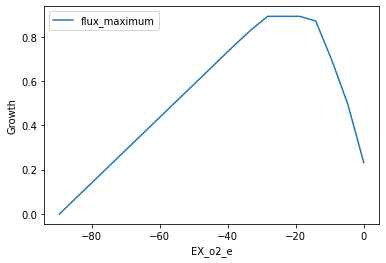

In [257]:
with model_M9_vio_fad:
    model_M9_vio_fad.reactions.EX_o2_e.bounds = -1000, 1000
    ppp_o2_M9 = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.EX_o2_e],
                    objective=model_M9_vio_fad.reactions.Growth)
    
    maxvio = round(ppp_o2_M9.flux_maximum[ppp_o2_M9.flux_maximum.idxmax()], 4)
    v = ppp_o2_M9.EX_o2_e[round(ppp_o2_M9.flux_maximum,4) == maxvio]
    
    print('Optimal oxygen uptake rate for growth:', max(v), 'mmol/gDW/h')
    print('Maximum Growth rate:', model_M9_vio_fad.optimize().objective_value, '1/h')    
    ppp_o2_M9.plot(x='EX_o2_e', y='flux_maximum')
    plt.ylabel('Growth')

In M9 media, the optimal oxygen uptake rate is limited, and the growth rate is low even if we didn't want to limit the oxygen.

### Oxygen uptake for production

Optimal oxygen uptake rate for production: -14.140866873065036 mmol/gDW/h
Maximum production rate: 1.9159335288367532 1/h


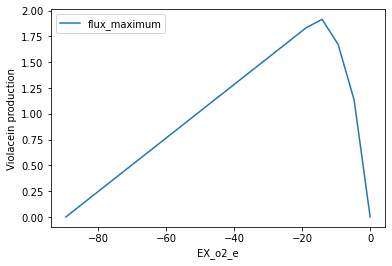

In [265]:
with model_M9_vio_fad:
    model_M9_vio_fad.reactions.EX_o2_e.bounds = -1000, 1000
    
    model_M9_vio_fad.objective = model_M9_vio_fad.reactions.Violacein
    violacein_production = model_M9_vio_fad.optimize().objective_value
    
    ppp_o2_M9_vio = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.EX_o2_e],
                    objective=model_M9_vio_fad.reactions.Violacein)
    
    maxvio = round(ppp_o2_M9_vio.flux_maximum[ppp_o2_M9_vio.flux_maximum.idxmax()], 4)
    v = ppp_o2_M9_vio.EX_o2_e[round(ppp_o2_M9_vio.flux_maximum,4) == maxvio]
    
    print('Optimal oxygen uptake rate for production:', max(v), 'mmol/gDW/h')
    print('Maximum production rate:', violacein_production, '1/h')  
    ppp_o2_M9_vio.plot(x='EX_o2_e', y='flux_maximum')
    plt.ylabel('Violacein production')

If we set the objective to production, the values are still low with the default carbon source maximum uptake rate, and the oxygen uptake rate is the same as for growth.

## Analysis of the correlation between Growth and Violacein production in M9 media

### With oxygen uptake bounds set to default values

Growth rate at the maximum production reached: 0.0 mmol/gDW/h
Maximum production rate: 1.4705882352941155 1/h


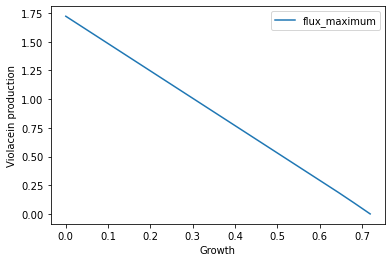

In [261]:
with model_M9_vio_fad:
    
    model_LB_vio_fad.objective = model_LB_vio_fad.reactions.Violacein
    violacein_production = model_LB_vio_fad.optimize().objective_value
    
    ppp_Growth_M9 = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.Growth],
                    objective=model_M9_vio_fad.reactions.Violacein)
    
    maxvio = round(ppp_Growth_M9.flux_maximum[ppp_Growth_M9.flux_maximum.idxmax()], 4)
    v = ppp_Growth_M9.Growth[round(ppp_Growth_M9.flux_maximum,4) == maxvio]
    
    print('Growth rate at the maximum production reached:', max(v), 'mmol/gDW/h')
    print('Maximum production rate:', violacein_production, '1/h')      
    ppp_Growth_M9.plot(x='Growth', y='flux_maximum')
    plt.ylabel('Violacein production')

### With oxygen uptake bound set to -61, 0 and glucose uptake rate set to -21.5, 0

Growth rate at the maximum production reached: 0.0 mmol/gDW/h
Maximum production rate: 1.7223198594024594 1/h


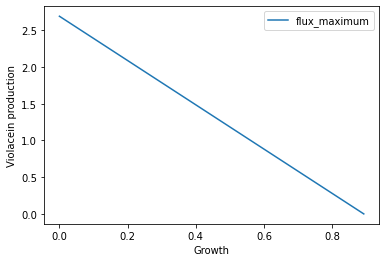

In [262]:
with model_M9_vio_fad:
    
    model_M9_vio_fad.objective = model_M9_vio_fad.reactions.Violacein
    violacein_production = model_M9_vio_fad.optimize().objective_value
    
    model_M9_vio_fad.reactions.EX_o2_e.bounds = -61, 0
    model_M9_vio_fad.reactions.EX_glc__D_e.bounds = -21.5, 0
    ppp_Growth_M9 = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.Growth],
                    objective=model_M9_vio_fad.reactions.Violacein)
    
    maxvio = round(ppp_Growth_M9.flux_maximum[ppp_Growth_M9.flux_maximum.idxmax()], 4)
    v = ppp_Growth_M9.Growth[round(ppp_Growth_M9.flux_maximum,4) == maxvio]
    
    print('Growth rate at the maximum production reached:', max(v), 'mmol/gDW/h')
    print('Maximum production rate:', violacein_production, '1/h')  
    ppp_Growth_M9.plot(x='Growth', y='flux_maximum')
    plt.ylabel('Violacein production')

The growth rate and the production are inversly proportional to each other. The production rate is a little higher if we allow the oxygen uptake rate to be higher.

### Glucose and oxygen uptake rates set to chosen values, steady state growth set to 20% of the max

Because the growth rate is 0 in the case of setting the objective to production, we decided to keep it on a countinuous but steady growth, which is the 20% of the maximum possible growth rate.

Growth rate at the maximum production with 20% minimum growth: 0.1786157157002228 mmol/gDW/h
Maximum production rate: 2.1538461538461484 1/h


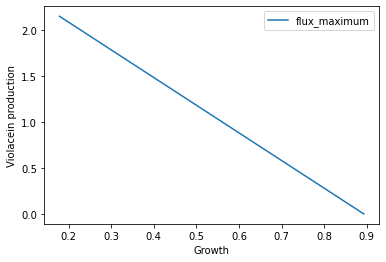

In [264]:
with model_M9_vio_fad:
    model_M9_vio_fad.reactions.EX_o2_e.bounds = -61, 0
    model_M9_vio_fad.reactions.EX_glc__D_e.bounds = -21.0, 0
    
    Growth = model_M9_vio_fad.optimize().fluxes.Growth
    model_M9_vio_fad.reactions.Growth.lower_bound = Growth*0.2
    
    model_M9_vio_fad.objective = model_M9_vio_fad.reactions.Violacein
    violacein_production = model_M9_vio_fad.optimize().objective_value
    
    ppp_Growth_M9 = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.Growth],
                    objective=model_M9_vio_fad.reactions.Violacein)
    
    maxvio = round(ppp_Growth_M9.flux_maximum[ppp_Growth_M9.flux_maximum.idxmax()], 4)
    v = ppp_Growth_M9.Growth[round(ppp_Growth_M9.flux_maximum,4) == maxvio]
    
    print('Growth rate at the maximum production with 20% minimum growth:', max(v), 'mmol/gDW/h')
    print('Maximum production rate:', model_M9_vio_fad.optimize().objective_value, '1/h')  
    ppp_Growth_M9.plot(x='Growth', y='flux_maximum')
    plt.ylabel('Violacein production')

The production rate is higher, and the explanation to this can be, that the cells are dead in the precious case before it reaches maximum production.